# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Q1_clean.csv')

#seeing which bourough in Neighbourhood is the most expensive
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe() 

#for some weird reason neighborhood has a space after?

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

*On average, Manhatton is the most expensive bourough in the dataset.*

In [103]:
#fixing neighborhood
df = df.rename(columns = {'Neighbourhood ': 'Neighbourhood'})
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

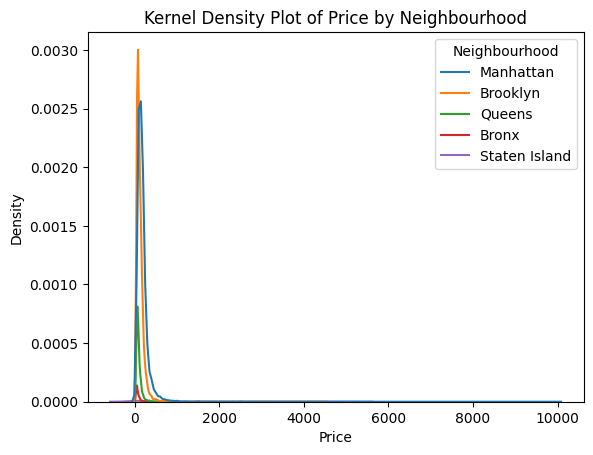

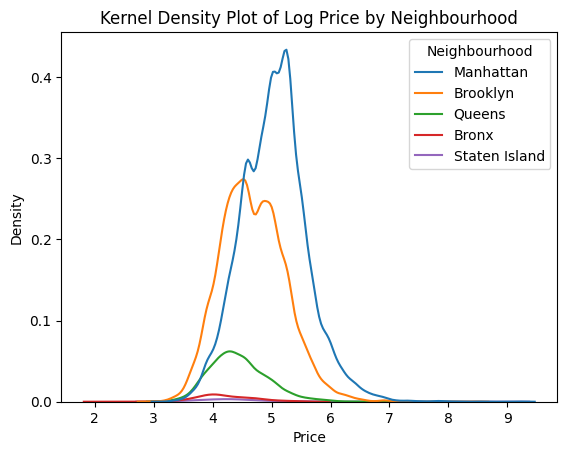

In [104]:
#creating a kernel density plot of price and log price, grouping by `Neighbourhood`
#price
price = df['Price']
neighborhood = df['Neighbourhood']

sns.kdeplot(x=price, hue=neighborhood)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.show()

#log price
sns.kdeplot(x=np.log(price), hue=neighborhood)
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?


In [105]:
from sklearn import linear_model

#creating dummy on neighborhood variable
x = pd.get_dummies(neighborhood, dtype='int')

#running regression w/o intercept
reg = linear_model.LinearRegression(fit_intercept=False).fit(x,price) 

#collection the coeffiecnts as results (from Simple regression on brand dummies)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print('R-squared: ', reg.score(x, price)) 
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


*From part 1, the average values for each neighborhood are the same as the results you'd get if you did a regression analysis using neighborhood categories. The regression is calculating average for each group, because it is not considering any other factors in the dataset. When looking at the regression results for these neighborhood categories, they're showing the average for each group, but this time it takes into account all the other factors included in the regression analysis.*

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [106]:
#repeat part 2
#creating dummy on neighborhood variable
#x = pd.get_dummies(neighborhood, dtype='int') #didnt work with this one
x = pd.get_dummies(neighborhood, dtype='int', drop_first = True)

#running regression w/ intercept this time
reg = linear_model.LinearRegression().fit(x,price) 

#collection the coeffiecnts as results (from Simple regression on brand dummies)
results = pd.DataFrame({'variable':reg.feature_names_in_ , 'coefficient': reg.coef_})
print('R-squared: ', reg.score(x, price)) 
results

R-squared:  0.04631389606035208


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


*Difference in the creation of dummies was different as I needed to drop first (bronx) because I needed n-1 dummy variables. The dropped category (Bronx) becomes the reference category. The coefficients of the remaining dummy variables then represent the difference in the dependent variable relative to this baseline. The new calculated regression coefficients are now relative to the Bronx.* 

In [107]:
#getting the intercept from the regression model
reg.intercept_

75.27649769584607

*The intercept is 75.276.*

In [108]:
#getting coeffecients (need to add in the intercept)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


*To get the coefficient values from pt1 you need to add the intercept value to the coefficient values from pt2.*

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [109]:
from sklearn.model_selection import train_test_split

#combining review scores rating and neighborhood 
price = df['Price']
x = df.loc[:,['Review Scores Rating', 'Neighbourhood']]

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x,price, #target is price
                                                    test_size=.2, #80 train / 20 test
                                                    random_state=100) #For replication purposes

#feature matrices for both train and test set (z)
Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

#run regression
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

#Predictions
y_hat = reg.predict(Z_test)

#r squared value
print('R-squared: ', reg.score(Z_test,y_test))

#RMSE
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ', rmse) 

#regression coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results


R-squared:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


*Manhattan is the most expesive property you can rent.*

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [110]:
#adding property type
from sklearn.model_selection import train_test_split

#combining review scores rating and neighborhood 
price = df['Price']
x = df.loc[:,['Review Scores Rating', 'Neighbourhood', 'Room Type']]

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x,price, #target is price
                                                    test_size=.2, #80 train / 20 test
                                                    random_state=100) #For replication purposes

#feature matrices for both train and test set (z)
Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood'], dtype='int'), pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],  pd.get_dummies(X_test['Neighbourhood'], dtype='int'), pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

#run regression
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

#Predictions
y_hat = reg.predict(Z_test)

#r squared value
print('R-squared: ', reg.score(Z_test,y_test))

#RMSE
rmse = np.sqrt(np.mean((y_test-y_hat)**2))
print('RMSE: ', rmse) 

#regression coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

R-squared:  0.22035348129282295
RMSE:  114.27692123130635


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


*The coefficient on Review Scores Rating is 0.626912. Most expensive would be an entire home apt in manhattan.*

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


*The change in the Review Scores Rating coefficient from part 4 to 5 in a regression analysis suggests that other factors are influencing the price. Initially, the coefficient shows how much rating impacts price alone. When additional factors, like room type, are included (in part 5), the coefficient adjusts to reflect this. A decrease in the coefficient indicates that factors like room type partly explain the price, reducing the isolated impact of ratings.*

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

In [111]:
#will return to

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.


In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/cars_hw.csv')

df.head() #looks fine for now, will return on cleaning if needed

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [113]:
#arcsining both price and mileage
df['PriceArc'] = np.arcsinh(df['Price'])
df['MileageArc'] = np.arcsinh(df['Mileage_Run'])

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?


In [115]:
#summarizing price variable with a .groupby() and .describe()
df['PriceArc'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


<Axes: xlabel='PriceArc', ylabel='Density'>

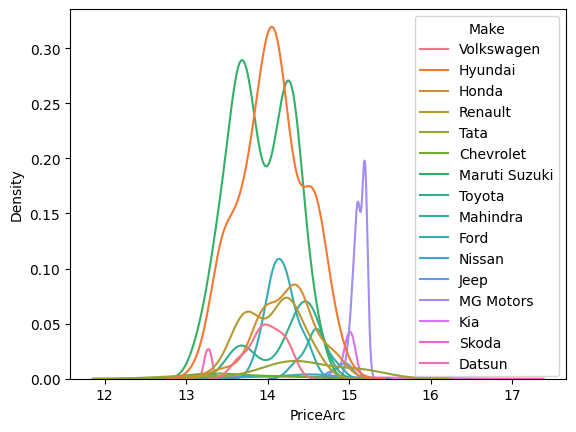

In [116]:
#creating the kde plot for price
sns.kdeplot(data = df, x='PriceArc',hue='Make')

*MG Motors is the most expensive car brand. In general prices seem to only have 1 peak for most car brands. There are a couple brands that have multiple peaks though like volkswagon.*

  3. Split the data into an 80% training set and a 20% testing set.
 

In [117]:
#randomizing the dataframe
dfSize = df.shape[0]
#randomize the order
df = df.sample(frac=1, random_state=100)
train_size = int(.8*dfSize) #split 80/20

#splitting training set
df_train = df[0:train_size]
y_train = df_train['PriceArc']

#splitting test
df_test = df[train_size:]
y_test = df_test['PriceArc']

 4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?


In [118]:
#regression on numeric:
#selected variables for the model
selected_vars = ['age', 'MileageArc', 'Seating_Capacity']

#preparing training data with selected features
training_data = df_train.loc[:, selected_vars]

#running linear regression model on training data
linear_model_reg = linear_model.LinearRegression().fit(training_data, y_train)

#test data with the same selected features
test_data = df_test.loc[:, selected_vars]

#predicting values from model
predicted_values = linear_model_reg.predict(test_data)

#r sqiared
test_set_r_squared = linear_model_reg.score(test_data, y_test)
print('Numeric only Rsq: ', test_set_r_squared)

#RMSE
test_set_rmse = np.sqrt(np.mean((y_test - predicted_values) ** 2))
print('Numeric only RMSE: ', test_set_rmse)


Numeric only Rsq:  0.45254262356326824
Numeric only RMSE:  0.3339265473590646


In [119]:
#categorical regression:
#selected categorical variables for the model
categorical_vars = ['Make', 'Body_Type', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type']

#dummy variables for each categorical variable
dummies = pd.DataFrame([])

#looping through each categorical variable to create dummies
for var in categorical_vars:
    new_dummies = pd.get_dummies(df.loc[:, var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1)

#splitting data set
train_size = len(y_train)
X_train_c = dummies.iloc[0:train_size, :]
X_test_c = dummies.iloc[train_size:, :]

#running lin reg model
regression_model_categorical = linear_model.LinearRegression().fit(X_train_c, y_train)

#value prediction
predicted_values_categorical = regression_model_categorical.predict(X_test_c)

#r squared
test_set_r_squared_categorical = regression_model_categorical.score(X_test_c, y_test)
print('Categorical only Rsq: ', test_set_r_squared_categorical)

#RMSE
test_set_rmse_categorical = np.sqrt(np.mean((y_test - predicted_values_categorical) ** 2))
print('Categorical only RMSE: ', test_set_rmse_categorical)


Categorical only Rsq:  0.6298129532407459
Categorical only RMSE:  0.27459106425227287


*Based on the results, the model with categorical variables only performs better than the model with numeric variables only*

In [120]:
#combining numeric and categorical variables for regression:
combined_training_data = pd.concat([training_data, X_train_c], axis=1)

#combining test data from numeric and categorical variables
combined_test_data = pd.concat([test_data, X_test_c], axis=1)

combined_regression_model = linear_model.LinearRegression().fit(combined_training_data, y_train)
predicted_values_combined = combined_regression_model.predict(combined_test_data)

#rsquared and RMSE
combined_test_set_r_squared = combined_regression_model.score(combined_test_data, y_test)
print('Combined variables Rsq: ', combined_test_set_r_squared)
combined_test_set_rmse = np.sqrt(np.mean((y_test - predicted_values_combined) ** 2))
print('Combined variables RMSE: ', combined_test_set_rmse)


Combined variables Rsq:  0.7999206763763921
Combined variables RMSE:  0.20187237686198914


*The joint model performs the best though.*

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [140]:
from sklearn.preprocessing import PolynomialFeatures

#looping over different polynomial degrees
for deg in np.arange(1, 5):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    
    #expanding test data
    test_exp = poly.fit_transform(test_data)
    test_names = poly.get_feature_names_out()
    test_df = pd.DataFrame(data=test_exp, columns=test_names)

    #expanding training data
    train_exp = poly.fit_transform(training_data)
    train_names = poly.get_feature_names_out()
    train_df = pd.DataFrame(data=train_exp, columns=train_names)

    #combining expanded training data with categorical
    train_df.reset_index(drop=True, inplace=True)
    training_data.reset_index(drop=True, inplace=True)
    train_all = pd.concat([train_df, training_data], axis=1)

    #combining expanded test data with categorical
    test_df.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)
    test_all = pd.concat([test_df, test_data], axis=1)

    #regression model and R outputs
    model = linear_model.LinearRegression().fit(train_all, y_train)
    rsq = model.score(test_all, y_test)
    print(deg, 'Rsq:', rsq)
    preds = model.predict(test_all)
    rmse = np.sqrt(np.mean((y_test - preds) ** 2))
    print(deg, 'RMSE:', rmse)



1 Rsq: 0.452658820542851
1 RMSE: 0.3338911077824227
2 Rsq: 0.43300919909237046
2 RMSE: 0.33983162920268434
3 Rsq: 0.4150160261462834
3 RMSE: 0.3451817096004048
4 Rsq: -13423702412.492298
4 RMSE: 52289.194187010486


*As the degree of polynomial expansion in the model increases from 1 to 3, both the R^2 decreases and the RMSE increases, indicating the model's performance is worsening. At a polynomial degree of 4, the R^2 turns dramatically negative, signaling severe overfitting and poor model performance. The best model among the ones tested is with a polynomial degree of 1, having the highest R^2 and lowest RMSE, which suggests it most effectively captures the underlying pattern in the data. Higher-degree polynomial models lead to overfitting, as they start fitting noise rather than the actual trend.*

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [142]:
#setting deg to 1 to just get the degree 1 values
deg = 1

poly = PolynomialFeatures(degree=deg, include_bias=False)   
#expanding test data
test_exp = poly.fit_transform(test_data)
test_names = poly.get_feature_names_out()
test_df = pd.DataFrame(data=test_exp, columns=test_names)

#expanding training data
train_exp = poly.fit_transform(training_data)
train_names = poly.get_feature_names_out()
train_df = pd.DataFrame(data=train_exp, columns=train_names)

#combining expanded training data with categorical
train_df.reset_index(drop=True, inplace=True)
training_data.reset_index(drop=True, inplace=True)
train_all = pd.concat([train_df, training_data], axis=1)

#combining expanded test data with categorical
test_df.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
test_all = pd.concat([test_df, test_data], axis=1)

#regression model and R outputs
model = linear_model.LinearRegression().fit(train_all, y_train)
rsq = model.score(test_all, y_test)
print(deg, 'Rsq:', rsq)
preds = model.predict(test_all)
rmse = np.sqrt(np.mean((y_test - preds) ** 2))

1 Rsq: 0.452658820542851


In [144]:
# Predictions and residuals:
y_hat_all = model.predict(test_all)
residuals = y_test - y_hat_all

<Axes: xlabel='PriceArc'>

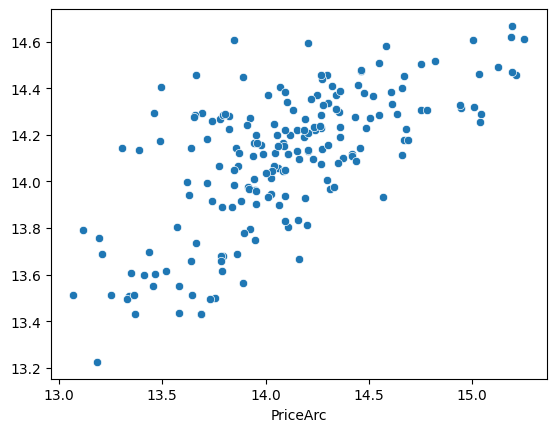

In [145]:
# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

<Axes: xlabel='PriceArc', ylabel='Density'>

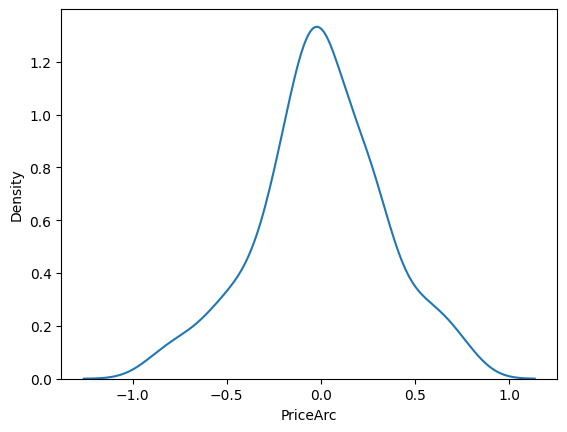

In [146]:
sns.kdeplot(residuals)

*For the first degree model the values still seemed pretty scattered. They follow a diagonal pattern but its not that narrow. The residuals look good as there is only one peak at 0.0 and the curve appears to be pretty symetric.* 

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.


2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.** 
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?